In [11]:
import pickle
import matplotlib.pyplot as plt

In [12]:
# load data for gateway failure
with open("log_exp_gf1.pkl", "rb") as f:
    data = pickle.load(f)


In [13]:
print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))
primary_board_ind = 1
redundant_board_ind = 3

0 30 0 35


In [16]:
data[1]

[((623.1799926757812,
   0.0,
   22.474824905395508,
   1005.8616943359375,
   22.100000381469727,
   18.100000381469727,
   23.399999618530273,
   24.0,
   22.80000114440918,
   25.100000381469727,
   22.30000114440918,
   24.899999618530273,
   -157.0,
   0,
   0,
   0,
   94420780),
  94420780,
  0,
  -95,
  28,
  28,
  [2023, 3, 6, 14, 54, 8]),
 ((611.4099731445312,
   0.0,
   21.376110076904297,
   1005.7775268554688,
   22.200000762939453,
   18.30000114440918,
   23.5,
   24.200000762939453,
   22.899999618530273,
   25.30000114440918,
   22.399999618530273,
   24.899999618530273,
   -27.0,
   0,
   0,
   1,
   94420780),
  94420780,
  1,
  -78,
  55,
  55,
  [2023, 3, 6, 14, 54, 34]),
 ((612.4199829101562,
   0.0,
   21.083118438720703,
   1005.7745361328125,
   22.30000114440918,
   18.200000762939453,
   23.5,
   24.0,
   23.0,
   25.100000381469727,
   22.5,
   24.80000114440918,
   -27.0,
   0,
   0,
   2,
   94420780),
  94420780,
  2,
  -94,
  82,
  82,
  [2023, 3, 6, 14,

In [17]:
data[3]

[((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -20.0,
   0,
   0,
   0,
   3903892222),
  3903892222,
  0,
  -94,
  62,
  62,
  [2023, 3, 6, 14, 54, 41]),
 ((576.9600219726562,
   0.0,
   21.730140686035156,
   1002.7669677734375,
   25.0,
   28.5,
   24.0,
   28.399999618530273,
   23.700000762939453,
   28.600000381469727,
   23.100000381469727,
   31.0,
   -21.0,
   0,
   0,
   3,
   3903892222),
  3903892222,
  3,
  -94,
  99,
  99,
  [2023, 3, 6, 14, 55, 21]),
 ((575.3400268554688,
   0.0,
   21.485980987548828,
   1002.673828125,
   25.200000762939453,
   28.30000114440918,
   24.100000381469727,
   28.100000381469727,
   23.80000114440918,
   28.5,
   23.200000762939453,
   30.899999618530273,
   -21.0,
   0,
   0,
   4,
   3903892222),
  3903892222,
  4,
  -100,
  142,
  142,
  [2023, 3, 6, 14, 56, 5]),
 ((577.5900268554688,
   0.0,
   21.363901138305664,
   1002.69580078125,
   25.30000114440918,
   28.39999961853

In [8]:
data_format = ('payload', 'board_id', 'pkt_no', 'RSSI', 'Tx_time', 'reTx_time', 'rx_time' )

In [9]:
### Number of Packets received by primary board and redundant board
print('Primary Board:', len(data[1]))
print('Redundant Board:', len(data[3]))

Primary Board: 30
Redundant Board: 35


In [10]:
### check if all packets belong to same board
### PB
pb_id = 0
rb_id = 0
for d_i, d in enumerate(data[1]):
    if d_i == 0:
        pb_id = d[1]
        print('PB Id:',pb_id) 
    assert(data[1][0][1]==d[1])
### RB
for d_i, d in enumerate(data[3]):
    if d_i == 0:
        rb_id = d[1]
        print('RB Id:', rb_id)
    assert(data[3][0][1]==d[1])

PB Id: 94420780
RB Id: 3903892222


#### Checking the confidence interval (40s)


In [16]:
data_all = data[1] + data[3]

In [17]:
len(data_all)

65

In [18]:
for d in data_all:
    if d[5]-d[4]>0:
        #print(d[1],d[4:6], d[5]-d[4])
        print('packets outside conf. interval', d)
        

#### PRR of the sensor node as whole (PB+RB)

In [18]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]
            

In [19]:
### PRR of the sesnor node (PB+RB)
packet_num = []
num_pkts_sent = 0 
num_pkts_rx = 0
for d in data_pkts:
    if d[2] not in packet_num:
        packet_num += [d[2]]
num_pkts_sent = max(packet_num)
num_pkts_rx = len(packet_num)
prr_sn = (num_pkts_rx/num_pkts_sent) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the sensor node: 80.3030303030303


In [20]:
packet_num

[0,
 1,
 2,
 7,
 8,
 11,
 13,
 15,
 22,
 26,
 31,
 33,
 35,
 38,
 42,
 45,
 46,
 47,
 49,
 50,
 52,
 54,
 55,
 57,
 59,
 60,
 61,
 62,
 65,
 66,
 3,
 4,
 5,
 9,
 12,
 14,
 16,
 17,
 18,
 24,
 27,
 28,
 29,
 30,
 34,
 36,
 39,
 43,
 48,
 51,
 56,
 58,
 63]

#### Average RSSI of Redundant Gateway

In [19]:
import numpy as np

In [27]:
data_all = data[1] + data[3]

In [20]:
len(data_all) == (len(data[1]) + len(data[3]))

True

In [21]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]

In [22]:
rssi_data = []
for d in data_pkts:
    rssi_data += [d[3]]

In [52]:
len(rssi_data)

55

In [24]:
avg_rssi = np.mean(rssi_data)

In [25]:
avg_rssi

-89.03636363636363

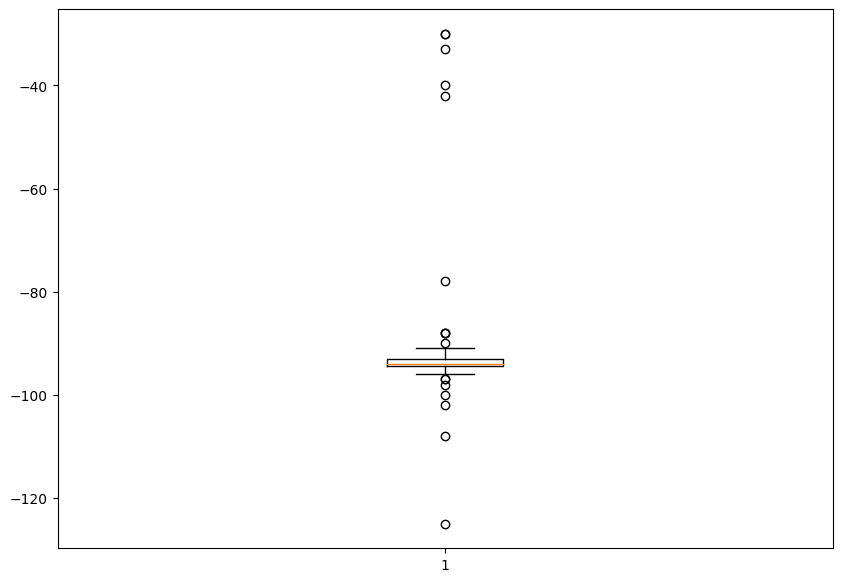

In [26]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(rssi_data)
# show plot
plt.show()

#### Average RSSI of regular gateway

In [5]:
# load data for gateway failure
with open("log_exp_sf1.pkl", "rb") as f:
    data_sf = pickle.load(f)
    
# load data for gateway failure
with open("log_exp_svf1.pkl", "rb") as f:
    data_svf = pickle.load(f)
    
# load data for gateway failure
with open("log_red2.pkl", "rb") as f:
    data_hf = pickle.load(f)

In [6]:
data_sf

[[],
 [((503.3999938964844,
    0.0,
    49.79620361328125,
    1027.1859130859375,
    21.399999618530273,
    16.899999618530273,
    21.399999618530273,
    24.700000762939453,
    21.30000114440918,
    25.80000114440918,
    21.399999618530273,
    23.399999618530273,
    -157.0,
    0,
    0,
    0,
    94420780),
   94420780,
   0,
   -98,
   31,
   31,
   [2023, 3, 3, 13, 47, 19]),
  ((528.0,
    0.0,
    49.80841064453125,
    1027.2010498046875,
    21.399999618530273,
    16.700000762939453,
    21.5,
    24.700000762939453,
    21.30000114440918,
    25.80000114440918,
    21.5,
    23.5,
    -53.0,
    0,
    0,
    1,
    94420780),
   94420780,
   1,
   -100,
   58,
   58,
   [2023, 3, 3, 13, 47, 46]),
  ((531.47998046875,
    0.0,
    39.517112731933594,
    1027.23876953125,
    21.399999618530273,
    16.600000381469727,
    21.5,
    24.600000381469727,
    21.399999618530273,
    25.600000381469727,
    21.600000381469727,
    23.30000114440918,
    -51.0,
    0,
  

In [41]:
exp_data = [data_sf, data_svf]
data_all = []
for de in exp_data:
    data = de[1] + de[3]
    data_all.extend(data)
#data_all.extend(data_hf[1]+data_hf[2])

#assert(len(data_all) == ( len(data_hf[1])+len(data_hf[2]) + len(data_sf[1])+len(data_sf[3]) + len(data_svf[1])+len(data_svf[3]) )) 
assert(len(data_all) == ( len(data_sf[1])+len(data_sf[3]) + len(data_svf[1])+len(data_svf[3]) )) 

In [42]:
len(data_all)

332

In [45]:
hb_pkts_rest = []
data_pkts_rest = []
for d in data_all:
    #print(d[0][0])
    if d[0][0] == -1:
        hb_pkts_rest += [d]
    else:
        data_pkts_rest += [d]

In [49]:
rssi_data_rest = []
for d in data_pkts_rest:
    rssi_data_rest += [d[3]]

In [53]:
np.mean(rssi_data_rest)

-95.15131578947368

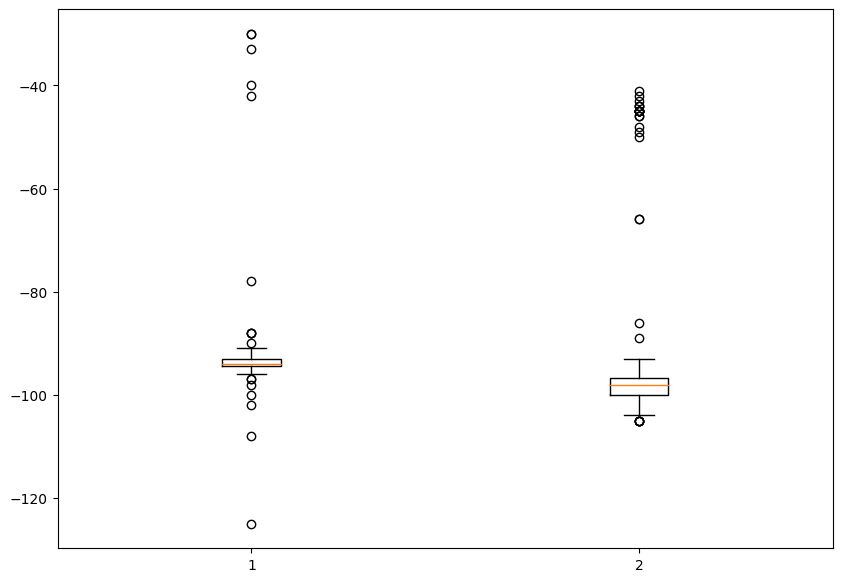

In [51]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot([rssi_data, rssi_data_rest])
# show plot
plt.show()